# 数据结构

In [34]:
import pandas as pd

In [35]:
import numpy as np

In [216]:
import matplotlib.pyplot as plt
%matplotlib inline

## Series

In [36]:
obj = pd.Series([1, 2, 3, -4])
obj

0    1
1    2
2    3
3   -4
dtype: int64

In [37]:
obj2 = pd.Series([1, -2, 3, 9], index=['a', 'b', 'c', 'd'])
obj2

a    1
b   -2
c    3
d    9
dtype: int64

In [38]:
obj2.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [39]:
obj2.values

array([ 1, -2,  3,  9])

In [40]:
obj2.value_counts()

 9    1
 3    1
-2    1
 1    1
dtype: int64

In [41]:
obj2

a    1
b   -2
c    3
d    9
dtype: int64

In [42]:
obj2[0]

1

In [43]:
obj2['a']

1

In [44]:
obj2[2:-1]

c    3
dtype: int64

In [45]:
obj2[[0,2]]

a    1
c    3
dtype: int64

In [46]:
obj2[['a','c']]

a    1
c    3
dtype: int64

In [47]:
obj2[obj2 >= 1]

a    1
c    3
d    9
dtype: int64

In [48]:
obj2 * 2

a     2
b    -4
c     6
d    18
dtype: int64

In [49]:
obj2

a    1
b   -2
c    3
d    9
dtype: int64

In [50]:
np.abs(obj2)

a    1
b    2
c    3
d    9
dtype: int64

In [51]:
data = {
    '张三':92,
    '李四':98,
    '王二麻子':89,
    '隔壁老王':100,
}

In [52]:
obj3 = pd.Series(data)
obj3

张三       92
李四       98
王二麻子     89
隔壁老王    100
dtype: int64

In [53]:
names = ['张三', '隔壁老王', '李四', '王二麻子']
obj4 = pd.Series(data, index=names)
obj4

张三       92
隔壁老王    100
李四       98
王二麻子     89
dtype: int64

In [54]:
obj4.name = '成绩单'
obj4.index.name = '学生'

In [55]:
obj4

学生
张三       92
隔壁老王    100
李四       98
王二麻子     89
Name: 成绩单, dtype: int64

## DataFrame

In [56]:
data = {
    'name' : ['Alex', 'Anderson', 'Tom', 'Lena'],
    'sex' : ['female', 'male', 'male', 'female'],
    'year' : [2001, 3001, 4001, 5001],
    'city' : ['Shanghai', 'Shenzhen', 'Zhuhai', 'Pingdingshan']
}

In [57]:
df = pd.DataFrame(data)
df

,name,sex,year,city
0,Alex,female,2001,Shanghai
1,Anderson,male,3001,Shenzhen
2,Tom,male,4001,Zhuhai
3,Lena,female,5001,Pingdingshan


In [58]:
df = pd.DataFrame(data, columns=['name', 'year', 'sex', 'city'], index=['a','b','c','d'])
df

,name,year,sex,city
a,Alex,2001,female,Shanghai
b,Anderson,3001,male,Shenzhen
c,Tom,4001,male,Zhuhai
d,Lena,5001,female,Pingdingshan


In [59]:
df.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [61]:
df.columns

Index(['name', 'year', 'sex', 'city'], dtype='object')

In [62]:
data2 = {
    'sex' : {'Alex' :'female', 'Lena' : 'female', 'Anderson':'male'},
    'city' : {'Alex': 'Zhuhai', 'Lena' : 'Shanghai', 'Anderson' : 'Pingdingshan'}
}
df2 = pd.DataFrame(data2,)
df2

,sex,city
Alex,female,Zhuhai
Lena,female,Shanghai
Anderson,male,Pingdingshan


In [63]:
df.index.name = 'id'
df.columns.name = 'std_info'
df

std_info,name,year,sex,city
id,,,,
a,Alex,2001,female,Shanghai
b,Anderson,3001,male,Shenzhen
c,Tom,4001,male,Zhuhai
d,Lena,5001,female,Pingdingshan


In [64]:
df.values

array([['Alex', 2001, 'female', 'Shanghai'],
       ['Anderson', 3001, 'male', 'Shenzhen'],
       ['Tom', 4001, 'male', 'Zhuhai'],
       ['Lena', 5001, 'female', 'Pingdingshan']], dtype=object)

## 索引对象

In [65]:
obj.index

RangeIndex(start=0, stop=4, step=1)

In [66]:
df.index

Index(['a', 'b', 'c', 'd'], dtype='object', name='id')

In [67]:
df.columns

Index(['name', 'year', 'sex', 'city'], dtype='object', name='std_info')

In [68]:
'a' in df.index

True

In [69]:
'sex' in df.columns

True

# 索引操作

## 重新索引

In [70]:
obj

0    1
1    2
2    3
3   -4
dtype: int64

In [71]:
obj2 = obj.reindex(['a', 'b', 'c', 'd', 'e'])
obj2

a   NaN
b   NaN
c   NaN
d   NaN
e   NaN
dtype: float64

In [72]:
obj = pd.Series([1, 2, 4, -9], index=[0, 2, 3, 5])
obj

0    1
2    2
3    4
5   -9
dtype: int64

In [73]:
obj2 = obj.reindex(range(6), method='ffill')
obj2

0    1
1    1
2    2
3    4
4    4
5   -9
dtype: int64

In [75]:
df = pd.DataFrame(np.arange(9).reshape(3,3), index=['a','c','d'],columns=['name','id','sex'])
df

,name,id,sex
a,0,1,2
c,3,4,5
d,6,7,8


In [76]:
df2 = df.reindex(['a','b','c','d'])
df2

,name,id,sex
a,0.0,1.0,2.0
b,NaN,NaN,NaN
c,3.0,4.0,5.0
d,6.0,7.0,8.0


In [77]:
df3 = df.reindex(columns=['name','year','id',])

In [78]:
df3

,name,year,id
a,0,NaN,1
c,3,NaN,4
d,6,NaN,7


In [79]:
df3.year = 0
df3

,name,year,id
a,0,0,1
c,3,0,4
d,6,0,7


## 更换索引

In [82]:
data = {
    'name' : ['Alex', 'Anderson', 'Tom', 'Lena'],
    'sex' : ['female', 'male', 'male', 'female'],
    'year' : [2001, 3001, 4001, 5001],
    'city' : ['Shanghai', 'Shenzhen', 'Zhuhai', 'Pingdingshan']
}

df = pd.DataFrame(data,)
df

,name,sex,year,city
0,Alex,female,2001,Shanghai
1,Anderson,male,3001,Shenzhen
2,Tom,male,4001,Zhuhai
3,Lena,female,5001,Pingdingshan


In [83]:
df2 = df.set_index('name')
df2

,sex,year,city
name,,,
Alex,female,2001,Shanghai
Anderson,male,3001,Shenzhen
Tom,male,4001,Zhuhai
Lena,female,5001,Pingdingshan


In [84]:
df2.index

Index(['Alex', 'Anderson', 'Tom', 'Lena'], dtype='object', name='name')

In [85]:
df3 = df2.reset_index()
df3

,name,sex,year,city
0,Alex,female,2001,Shanghai
1,Anderson,male,3001,Shenzhen
2,Tom,male,4001,Zhuhai
3,Lena,female,5001,Pingdingshan


In [86]:
df2

,sex,year,city
name,,,
Alex,female,2001,Shanghai
Anderson,male,3001,Shenzhen
Tom,male,4001,Zhuhai
Lena,female,5001,Pingdingshan


In [87]:
df

,name,sex,year,city
0,Alex,female,2001,Shanghai
1,Anderson,male,3001,Shenzhen
2,Tom,male,4001,Zhuhai
3,Lena,female,5001,Pingdingshan


In [88]:
data = {
    'name' : ['Alex', 'Anderson', 'Tom', 'Lena'],
    'grade' : [20, 30, 40, 50],
}
df = pd.DataFrame(data)
df

,name,grade
0,Alex,20
1,Anderson,30
2,Tom,40
3,Lena,50


In [89]:
df2 = df.sort_values('grade')
df2

,name,grade
0,Alex,20
1,Anderson,30
2,Tom,40
3,Lena,50


In [92]:
df3 = df.sort_values('grade', ascending=False)
df3

,name,grade
3,Lena,50
2,Tom,40
1,Anderson,30
0,Alex,20


In [93]:
df4 = df2.reset_index()
df4

,index,name,grade
0,0,Alex,20
1,1,Anderson,30
2,2,Tom,40
3,3,Lena,50


In [94]:
df2

,name,grade
0,Alex,20
1,Anderson,30
2,Tom,40
3,Lena,50


In [95]:
df4 = df2.reset_index(drop=True)
df4

,name,grade
0,Alex,20
1,Anderson,30
2,Tom,40
3,Lena,50


## 索引和选取

In [97]:
data = {
    'name' : ['Alex', 'Anderson', 'Tom', 'Lena'],
    'sex' : ['female', 'male', 'male', 'female'],
    'year' : [2001, 3001, 4001, 5001],
    'city' : ['Shanghai', 'Shenzhen', 'Zhuhai', 'Pingdingshan']
}
df = pd.DataFrame(data)
df

,name,sex,year,city
0,Alex,female,2001,Shanghai
1,Anderson,male,3001,Shenzhen
2,Tom,male,4001,Zhuhai
3,Lena,female,5001,Pingdingshan


In [98]:
df['city']

0        Shanghai
1        Shenzhen
2          Zhuhai
3    Pingdingshan
Name: city, dtype: object

In [99]:
df.city

0        Shanghai
1        Shenzhen
2          Zhuhai
3    Pingdingshan
Name: city, dtype: object

In [100]:
df[['city','name']]

,city,name
0,Shanghai,Alex
1,Shenzhen,Anderson
2,Zhuhai,Tom
3,Pingdingshan,Lena


In [102]:
df2 = df.set_index('name')
df2

,sex,year,city
name,,,
Alex,female,2001,Shanghai
Anderson,male,3001,Shenzhen
Tom,male,4001,Zhuhai
Lena,female,5001,Pingdingshan


In [103]:
df2[:2]

,sex,year,city
name,,,
Alex,female,2001,Shanghai
Anderson,male,3001,Shenzhen


In [108]:
df2['Alex':'Anderson']

,sex,year,city
name,,,
Alex,female,2001,Shanghai
Anderson,male,3001,Shenzhen


### loc 按行索引标签选取数据

In [109]:
df2.loc['Alex']

sex       female
year        2001
city    Shanghai
Name: Alex, dtype: object

In [111]:
df2.loc[['Alex','Tom']]

,sex,year,city
name,,,
Alex,female,2001,Shanghai
Tom,male,4001,Zhuhai


### iloc 按行索引位置选取数据

In [113]:
df2.iloc[1]

sex         male
year        3001
city    Shenzhen
Name: Anderson, dtype: object

In [116]:
df2.iloc[[1,3]]

,sex,year,city
name,,,
Anderson,male,3001,Shenzhen
Lena,female,5001,Pingdingshan


### bool

In [120]:
df2

,sex,year,city
name,,,
Alex,female,2001,Shanghai
Anderson,male,3001,Shenzhen
Tom,male,4001,Zhuhai
Lena,female,5001,Pingdingshan


In [122]:
m = df2['sex'] == 'female'

In [123]:
df2[m]

,sex,year,city
name,,,
Alex,female,2001,Shanghai
Lena,female,5001,Pingdingshan


In [126]:
n = df2['city'] == 'Shanghai'

In [127]:
df2[m&n]

,sex,year,city
name,,,
Alex,female,2001,Shanghai


## 操作行和列

### 增加

In [128]:
df

,name,sex,year,city
0,Alex,female,2001,Shanghai
1,Anderson,male,3001,Shenzhen
2,Tom,male,4001,Zhuhai
3,Lena,female,5001,Pingdingshan


In [129]:
new_data = {
    'city' : 'Ali',
    'sex' : 'female',
    'name' : "Mapae",
    'year' : 6001,
}

In [134]:
df = df.append(new_data,)

TypeError: Can only append a Series if ignore_index=True or if the Series has a name

In [132]:
df = df.append(new_data, ignore_index=True)
df

,name,sex,year,city
0,Alex,female,2001,Shanghai
1,Anderson,male,3001,Shenzhen
2,Tom,male,4001,Zhuhai
3,Lena,female,5001,Pingdingshan
4,Mapae,female,6001,Ali


In [135]:
df['class'] = 2099

In [136]:
df

,name,sex,year,city,class
0,Alex,female,2001,Shanghai,2099
1,Anderson,male,3001,Shenzhen,2099
2,Tom,male,4001,Zhuhai,2099
3,Lena,female,5001,Pingdingshan,2099
4,Mapae,female,6001,Ali,2099


In [137]:
df['math'] = [92, 56, 7, 67, 67]
df

,name,sex,year,city,class,math
0,Alex,female,2001,Shanghai,2099,92
1,Anderson,male,3001,Shenzhen,2099,56
2,Tom,male,4001,Zhuhai,2099,7
3,Lena,female,5001,Pingdingshan,2099,67
4,Mapae,female,6001,Ali,2099,67


### 删除

#### 删除行

In [138]:
new_df = df.drop(2)
new_df

,name,sex,year,city,class,math
0,Alex,female,2001,Shanghai,2099,92
1,Anderson,male,3001,Shenzhen,2099,56
3,Lena,female,5001,Pingdingshan,2099,67
4,Mapae,female,6001,Ali,2099,67


#### 删除列

In [139]:
new_df = df.drop('class', 1)
new_df

,name,sex,year,city,math
0,Alex,female,2001,Shanghai,92
1,Anderson,male,3001,Shenzhen,56
2,Tom,male,4001,Zhuhai,7
3,Lena,female,5001,Pingdingshan,67
4,Mapae,female,6001,Ali,67


### 修改

In [140]:
new_df

,name,sex,year,city,math
0,Alex,female,2001,Shanghai,92
1,Anderson,male,3001,Shenzhen,56
2,Tom,male,4001,Zhuhai,7
3,Lena,female,5001,Pingdingshan,67
4,Mapae,female,6001,Ali,67


In [144]:
new_df.rename(index={3:2,4:3},columns={'math':'Math'},)
new_df

,name,sex,year,city,Math
0,Alex,female,2001,Shanghai,92
1,Anderson,male,3001,Shenzhen,56
2,Tom,male,4001,Zhuhai,7
2,Lena,female,5001,Pingdingshan,67
3,Mapae,female,6001,Ali,67


In [145]:
new_df.rename(index={3:2,4:3},columns={'math':'Math'},inplace=True)
new_df

,name,sex,year,city,Math
0,Alex,female,2001,Shanghai,92
1,Anderson,male,3001,Shenzhen,56
2,Tom,male,4001,Zhuhai,7
2,Lena,female,5001,Pingdingshan,67
2,Mapae,female,6001,Ali,67


# 数据运算

## 算术运算

In [147]:
obj1 = pd.Series([3.2, 4.5, 6.7, 8.9], index=['a','b','c','d'])
obj1

a    3.2
b    4.5
c    6.7
d    8.9
dtype: float64

In [151]:
obj2 = pd.Series([4.0, 5.6, 4.5, 6.77], index=['a','d','e','f'])
obj2

a    4.00
d    5.60
e    4.50
f    6.77
dtype: float64

In [152]:
obj1 + obj2

a     7.2
b     NaN
c     NaN
d    14.5
e     NaN
f     NaN
dtype: float64

## 函数应用和映射

### map函数:将函数套用到 Series 的每个元素上

In [153]:
data = {
    'fruit' : ['apple', 'orange', 'grape', 'banana'],
    'price' : ['25yuan', '42yuan', '45yuan', '89yuan']
}
df = pd.DataFrame(data)
df

,fruit,price
0,apple,25yuan
1,orange,42yuan
2,grape,45yuan
3,banana,89yuan


In [158]:
def f(x):
    return x.split('yuan')[0]

In [159]:
f('5yuan')

'5'

In [160]:
df['price'] = df['price'].map(f)
df

,fruit,price
0,apple,25
1,orange,42
2,grape,45
3,banana,89


### apply 函数:将函数套用到 dataframe 的行与列上

In [161]:
df = pd.DataFrame(np.random.randn(3,3), columns=['a','b','c'],index=['app','win','nsc'])
df

,a,b,c
app,-0.084371,0.211283,-1.137143
win,-2.031535,-0.532631,-0.325309
nsc,-0.625564,0.066872,-1.572522


In [163]:
df.apply(lambda x:x.max() - x.min())

a    1.947164
b    0.743914
c    1.247213
dtype: float64

### applymap 函数:将函数套用到 dataframe 的每个元素上

In [164]:
df

,a,b,c
app,-0.084371,0.211283,-1.137143
win,-2.031535,-0.532631,-0.325309
nsc,-0.625564,0.066872,-1.572522


In [168]:
df.applymap(lambda x:'%.4f'%x)

,a,b,c
app,-0.0844,0.2113,-1.1371
win,-2.0315,-0.5326,-0.3253
nsc,-0.6256,0.0669,-1.5725


## 排序

In [169]:
obj1

a    3.2
b    4.5
c    6.7
d    8.9
dtype: float64

In [170]:
obj1.sort_values()

a    3.2
b    4.5
c    6.7
d    8.9
dtype: float64

In [171]:
obj1.sort_values(ascending=False)

d    8.9
c    6.7
b    4.5
a    3.2
dtype: float64

In [172]:
obj1.sort_index()

a    3.2
b    4.5
c    6.7
d    8.9
dtype: float64

In [173]:
obj1.sort_index(ascending=False)

d    8.9
c    6.7
b    4.5
a    3.2
dtype: float64

In [174]:
df

,a,b,c
app,-0.084371,0.211283,-1.137143
win,-2.031535,-0.532631,-0.325309
nsc,-0.625564,0.066872,-1.572522


In [176]:
df.sort_index()

,a,b,c
app,-0.084371,0.211283,-1.137143
nsc,-0.625564,0.066872,-1.572522
win,-2.031535,-0.532631,-0.325309


In [177]:
df.sort_index(ascending=False)

,a,b,c
win,-2.031535,-0.532631,-0.325309
nsc,-0.625564,0.066872,-1.572522
app,-0.084371,0.211283,-1.137143


In [178]:
df.sort_values('b')

,a,b,c
win,-2.031535,-0.532631,-0.325309
nsc,-0.625564,0.066872,-1.572522
app,-0.084371,0.211283,-1.137143


In [179]:
df.sort_values('b',ascending=False)

,a,b,c
app,-0.084371,0.211283,-1.137143
nsc,-0.625564,0.066872,-1.572522
win,-2.031535,-0.532631,-0.325309


In [180]:
df.sort_values(['b','c'])

,a,b,c
win,-2.031535,-0.532631,-0.325309
nsc,-0.625564,0.066872,-1.572522
app,-0.084371,0.211283,-1.137143


## 汇总和统计

In [181]:
df

,a,b,c
app,-0.084371,0.211283,-1.137143
win,-2.031535,-0.532631,-0.325309
nsc,-0.625564,0.066872,-1.572522


In [182]:
df.sum()

a   -2.741470
b   -0.254477
c   -3.034973
dtype: float64

In [183]:
df.sum(1)

app   -1.010231
win   -2.889475
nsc   -2.131214
dtype: float64

In [184]:
df.describe()

,a,b,c
count,3.000000,3.000000,3.000000
mean,-0.913823,-0.084826,-1.011658
std,1.005078,0.394476,0.633005
min,-2.031535,-0.532631,-1.572522
25%,-1.328550,-0.232880,-1.354832
50%,-0.625564,0.066872,-1.137143
75%,-0.354968,0.139077,-0.731226
max,-0.084371,0.211283,-0.325309


## 唯一值和计数

In [190]:
obj1[1] = 3.2
obj1

a    3.2
b    3.2
c    6.7
d    8.9
dtype: float64

In [192]:
obj1.unique()

array([3.2, 6.7, 8.9])

In [193]:
obj1.value_counts()

3.2    2
6.7    1
8.9    1
dtype: int64

In [194]:
df

,a,b,c
app,-0.084371,0.211283,-1.137143
win,-2.031535,-0.532631,-0.325309
nsc,-0.625564,0.066872,-1.572522


In [196]:
df.a.unique()

array([-0.08437104, -2.03153538, -0.62556397])

In [197]:
df.a.value_counts()

-0.625564    1
-0.084371    1
-2.031535    1
Name: a, dtype: int64

# 层次化索引

In [200]:
obj = pd.Series(
        np.random.randn(9),
        index = [[
            'one','one','one',
            'two','two','two',
            'three','three','three'],
        ['a','b','c',
         'a','b','c',
         'a','b','c',]
])
obj

one    a   -0.539179
       b    0.310353
       c   -0.182941
two    a    0.310620
       b    0.262080
       c    0.449835
three  a    0.665678
       b    2.272791
       c    0.816589
dtype: float64

In [201]:
obj.index

MultiIndex([(  'one', 'a'),
            (  'one', 'b'),
            (  'one', 'c'),
            (  'two', 'a'),
            (  'two', 'b'),
            (  'two', 'c'),
            ('three', 'a'),
            ('three', 'b'),
            ('three', 'c')],
           )

In [202]:
obj['two']

a    0.310620
b    0.262080
c    0.449835
dtype: float64

In [203]:
obj[:,'a']

one     -0.539179
two      0.310620
three    0.665678
dtype: float64

In [204]:
df = pd.DataFrame(np.arange(16).reshape(4,4),
                 index = [['one','one','two','two'],['a','b','a','b']],
                 columns = [['apple','apple','orange','orange'],['red','green','red','green']])
df

apple       orange      
        red green    red green
one a     0     1      2     3
    b     4     5      6     7
two a     8     9     10    11
    b    12    13     14    15

In [205]:
df['apple']

red  green
one a    0      1
    b    4      5
two a    8      9
    b   12     13

In [210]:
df['apple'].loc['one'].red

a    0
b    4
Name: red, dtype: int64

## 重排分级顺序

In [211]:
df.swaplevel(0,1)

apple       orange      
        red green    red green
a one     0     1      2     3
b one     4     5      6     7
a two     8     9     10    11
b two    12    13     14    15

In [212]:
df

apple       orange      
        red green    red green
one a     0     1      2     3
    b     4     5      6     7
two a     8     9     10    11
    b    12    13     14    15

## 汇总统计

In [213]:
df.sum(0)

apple   red      24
        green    28
orange  red      32
        green    36
dtype: int64

In [214]:
df.sum(level=0)

apple       orange      
      red green    red green
one     4     6      8    10
two    20    22     24    26

In [215]:
df.sum(level=1, axis=1)

red  green
one a    2      4
    b   10     12
two a   18     20
    b   26     28

# 可视化 

## 线形图

In [217]:
s = pd.Series(np.random.normal(size=10))
s

0    1.264298
1    0.176537
2   -1.375983
3    0.367719
4    0.051469
5    0.128247
6    0.636723
7   -0.190060
8    0.564481
9    0.256351
dtype: float64

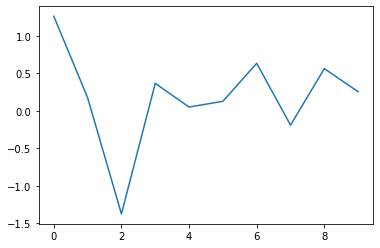

In [218]:
s.plot()

In [220]:
df = pd.DataFrame({'normal':np.random.normal(size=100),
                  'gamma':np.random.gamma(1,size=100),
                  'poisson':np.random.poisson(size=100)})
df

,normal,gamma,poisson
0,-0.617488,2.082849,0
1,0.625475,0.337845,0
2,1.064299,1.087263,2
3,-0.758497,1.121295,1
4,-0.454712,0.672954,1
...,...,...,...
95,-0.660187,1.811985,4
96,0.605089,3.195152,1
97,0.825125,1.169401,0
98,-0.099433,0.197246,4


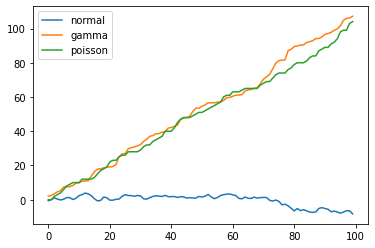

In [221]:
df.cumsum().plot()

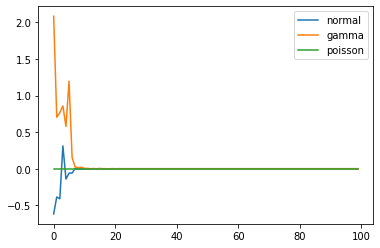

In [222]:
df.cumprod().plot()

## 柱状图📊

In [223]:
data = {
    'name' : ['Alex', 'Anderson', 'Tom', 'Lena'],
    'sex' : ['female', 'male', 'male', 'female'],
    'year' : [2001, 3001, 4001, 5001],
    'city' : ['Shanghai', 'Shenzhen', 'Zhuhai', 'Pingdingshan']
}
df = pd.DataFrame(data)
df

,name,sex,year,city
0,Alex,female,2001,Shanghai
1,Anderson,male,3001,Shenzhen
2,Tom,male,4001,Zhuhai
3,Lena,female,5001,Pingdingshan


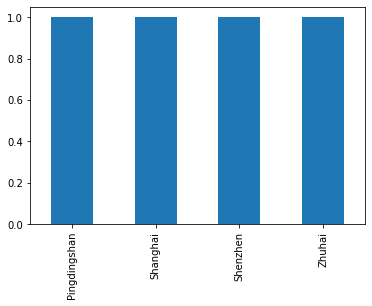

In [228]:
df.city.value_counts().plot(kind='bar')

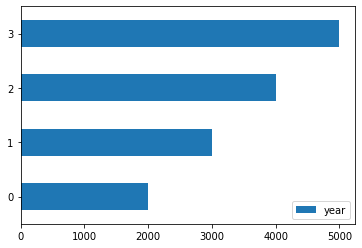

In [229]:
df.plot(kind='barh')

In [230]:
df2 = pd.DataFrame(np.random.randint(0,100,size=(3,3)),
                  index = ('one','two','three'),
                  columns = ['A','B','C'])
df2

,A,B,C
one,76,78,23
two,86,96,7
three,32,25,15


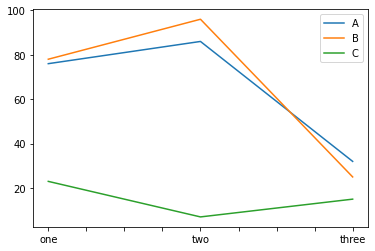

In [231]:
df2.plot()

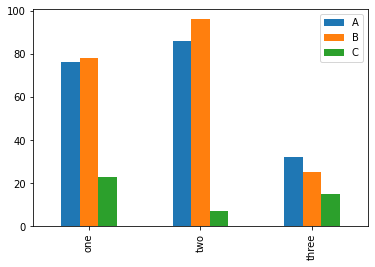

In [232]:
df2.plot(kind='bar')

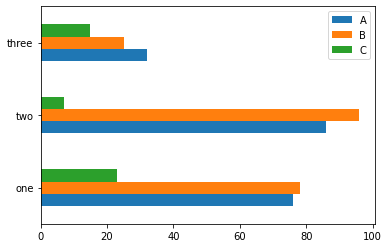

In [233]:
df2.plot(kind='barh')

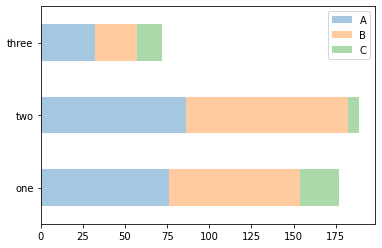

In [238]:
df2.plot(kind='barh',stacked=True, alpha=0.4)

## 直方图和密度图

In [240]:
s = pd.Series(np.random.normal(size=100))
s

0    -0.287831
1     0.336128
2     0.643024
3    -0.309511
4    -0.101771
        ...   
95    0.690396
96    0.222075
97   -1.162159
98   -0.054317
99    0.368862
Length: 100, dtype: float64

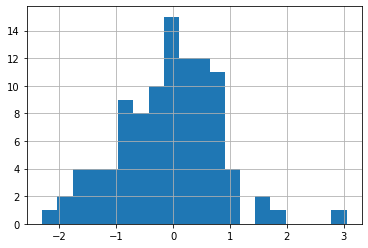

In [242]:
s.hist(bins=20,grid=True)

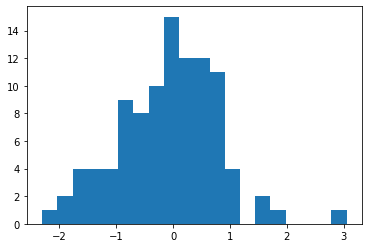

In [243]:
s.hist(bins=20,grid=False)

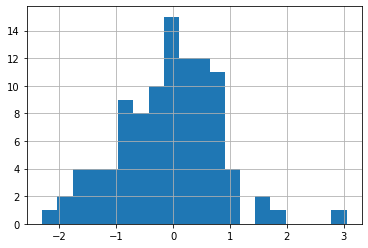

In [244]:
s.hist(bins=20,)

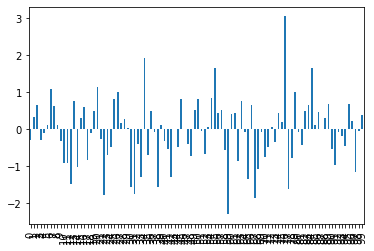

In [245]:
s.plot(kind='bar')

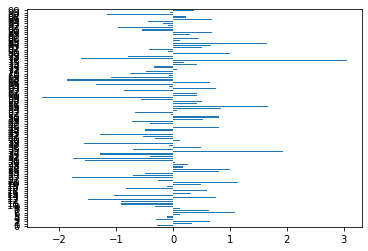

In [246]:
s.plot(kind='barh')

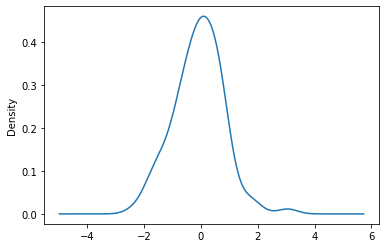

In [247]:
s.plot(kind='kde')

## 散点图

In [248]:
df3 = pd.DataFrame(np.arange(10), columns=['X'])
df3

,X
0,0
1,1
2,2
3,3
4,4
5,5
6,6
7,7
8,8
9,9


In [250]:
df3['Y'] = df3['X'] * 3 + 5
df3

,X,Y
0,0,5
1,1,8
2,2,11
3,3,14
4,4,17
5,5,20
6,6,23
7,7,26
8,8,29
9,9,32


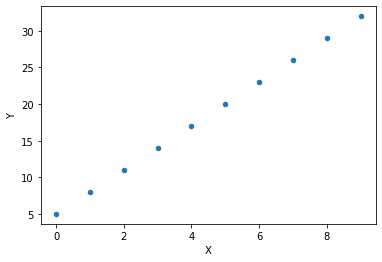

In [252]:
df3.plot(kind='scatter',x='X',y='Y')